In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('historical_automobile_sales.csv')
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

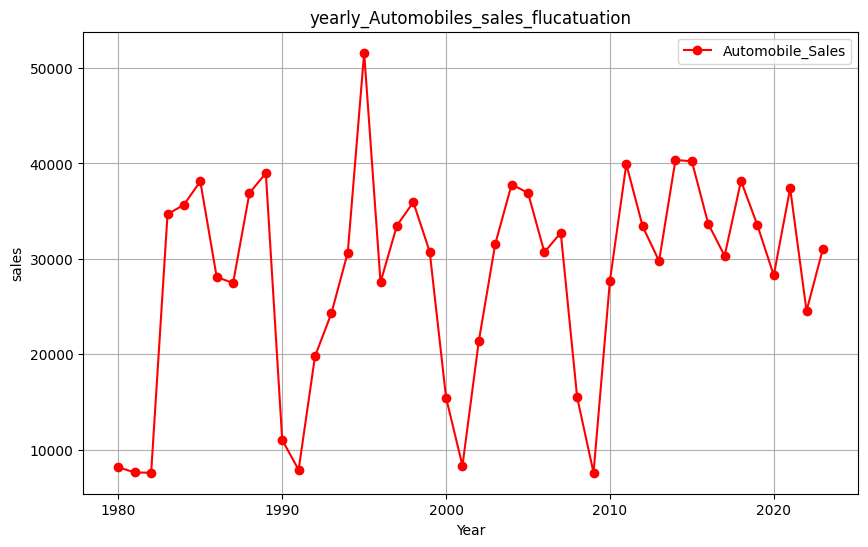

In [4]:
#Q 1:  Develop a Line chart using the functionality of pandas to show how
#      automobile sales fluctuate from year to year. 

sales =  df.groupby('Year')['Automobile_Sales'].sum()
plt.figure(figsize=(10,6))
sales.plot(kind='line',marker='o',color='red')
plt.title('yearly_Automobiles_sales_flucatuation')
plt.xlabel('Year')
plt.ylabel('sales')
plt.legend()
plt.grid()
plt.show()

In [5]:
'''Q 2: Plot different lines for categories of vehicle type and analyze the trend
to answer the question Is there a noticeable difference in sales trends
between different vehicle types during recession periods? '''





recession_periods = df[df["Recession"] == 1]
recession_periods


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,12/31/2009,2009,Dec,1,94.83,0.25,20863.845,1832,8,37.003,-0.459719,5.0,594.5,Smallfamiliycar,Illinois
109,9/30/2020,2020,Sep,1,111.62,0.07,33435.708,2622,8,17.046,-1.170773,3.7,692.8,Mediumfamilycar,Illinois
110,10/31/2020,2020,Oct,1,84.48,0.00,29408.199,4700,4,53.028,0.678547,3.6,214.0,Sports,California
111,11/30/2020,2020,Nov,1,112.39,0.07,24960.137,4945,8,24.367,-1.176222,4.2,597.1,Mediumfamilycar,New York


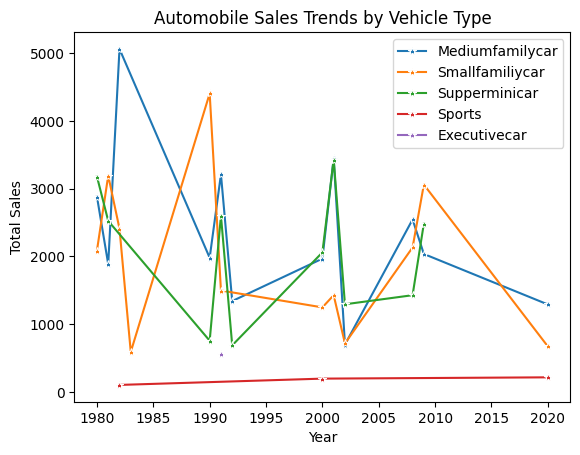

In [23]:
Sale= recession_periods.groupby(['Year','Vehicle_Type'])['Automobile_Sales'].sum().reset_index()
Sale
sns.lineplot(data=Sale,x='Year',y='Automobile_Sales',hue='Vehicle_Type',marker='*')
plt.title('Automobile Sales Trends by Vehicle Type')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

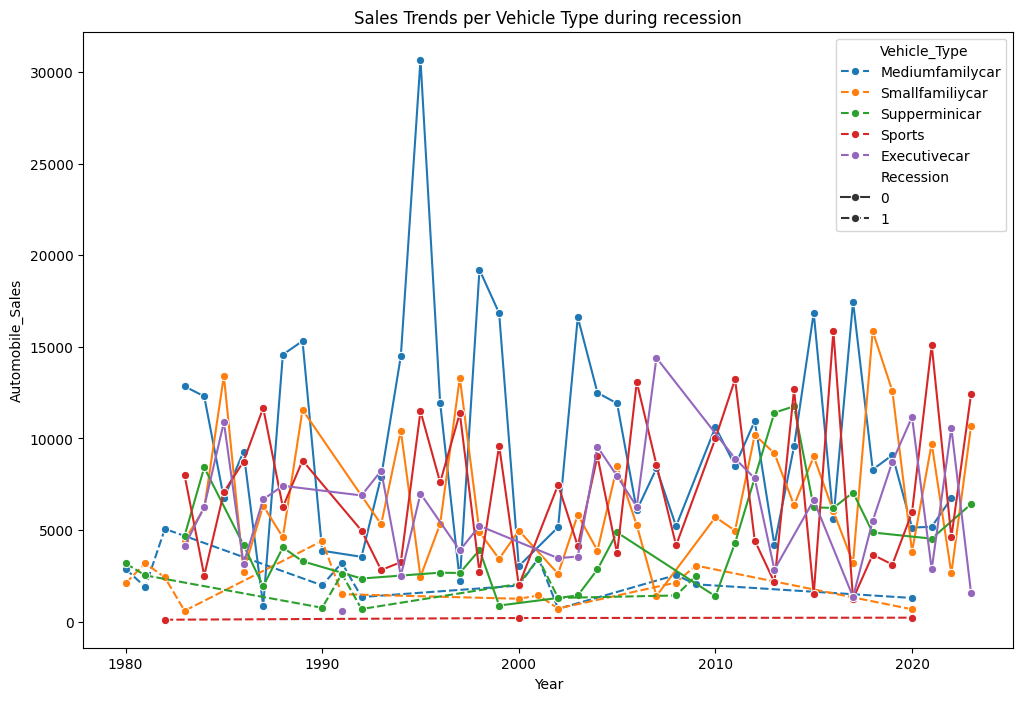

In [38]:
Sale= df.groupby(['Year','Vehicle_Type','Recession'])['Automobile_Sales'].sum().reset_index()
plt.figure(figsize=(12,8))
sns.lineplot(data=Sale,x='Year',y='Automobile_Sales',hue='Vehicle_Type',marker='o',linestyle='dashed',style='Recession')
plt.title('Sales Trends per Vehicle Type during recession')
plt.show()




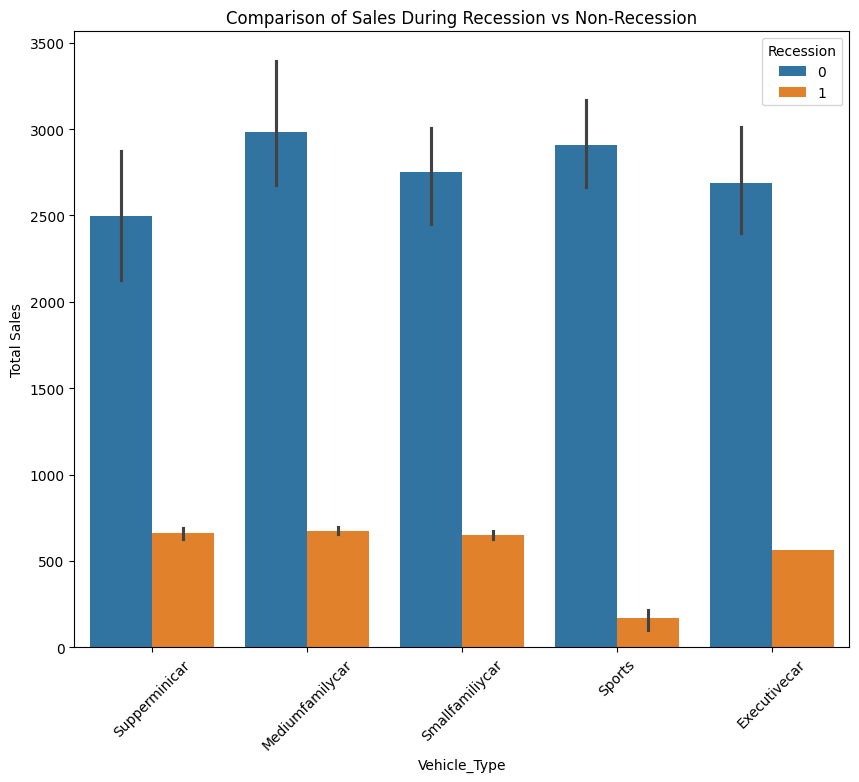

In [39]:
#Q 4: Now you want to compare the sales of different vehicle types during a recession and a non-recession period 


plt.figure(figsize=(10,8))
sns.barplot(data=df,x='Vehicle_Type',y='Automobile_Sales',hue='Recession')
plt.title('Comparison of Sales During Recession vs Non-Recession')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()